<a href="https://colab.research.google.com/github/vrobbin/DeepLearningCIFAR10/blob/main/ConvNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

In [ ]:
trainX[0].shape

(32, 32, 3)

In [ ]:
trainy.shape

(50000, 1)

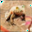

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

cv.imwrite('./color_img.jpg', trainX[0])
cv2_imshow(trainX[0]*255)


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

ValueError: ignored

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

# we have to normalize the image data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainX_ = [transform(i) for i in trainX]
testX_ = [transform(i) for i in testX]
trainy_ = torch.from_numpy(trainy)
testy_ = torch.from_numpy(testy)

input_ = torch.from_numpy(trainX)
labels_ = torch.from_numpy(trainy)

input__ = input_.permute(0,3,2,1)
labels__ = labels_[:,0]

labels_ = labels_.long()


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [4]:
images_ = torch.stack(trainX_)
imagest_ = torch.stack(testX_)
labels_ = trainy_[:,0]
labels_ = labels_.long()
labelst_ = testy_[:,0]
labelst_ = labelst_.long()

data_ = (images_, labels_)
data_[0][:4].shape

torch.Size([4, 3, 32, 32])

In [8]:
steps_batch = np.arange(0, 50000, 48).tolist()

In [6]:
print(torch.cuda.is_available())
device = torch.device("cuda:0")

True


In [17]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 24, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(24, 64, 5)
        self.fc1 = nn.Linear(64 * 5 * 5, 240)
        self.fc2 = nn.Linear(240, 112)
        self.fc3 = nn.Linear(112, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)



criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.004, momentum=0.9)


for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i in tqdm(range(len(steps_batch)-1)):
        # get the inputs; data is a list of [inputs, labels]
        inputs = data_[0][steps_batch[i]:steps_batch[i+1]]
        labels = data_[1][steps_batch[i]:steps_batch[i+1]]
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        outputs = outputs.to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            if (running_loss / 2000) < 0.1:
              torch.save(net.state_dict(), f'cifarBEST_{epoch+1}.pth')
            running_loss = 0.0

print('Finished Training')

 51%|█████     | 1067/2083 [00:02<00:02, 459.20it/s]

[1,  1000] loss: 0.934


  0%|          | 0/2083 [00:00<?, ?it/s]

[1,  2000] loss: 0.722


 52%|█████▏    | 1073/2083 [00:02<00:02, 450.78it/s]

[2,  1000] loss: 0.620


  0%|          | 0/2083 [00:00<?, ?it/s]

[2,  2000] loss: 0.555


 51%|█████▏    | 1070/2083 [00:02<00:02, 442.46it/s]

[3,  1000] loss: 0.502


  0%|          | 0/2083 [00:00<?, ?it/s]

[3,  2000] loss: 0.463


 51%|█████▏    | 1069/2083 [00:02<00:02, 459.74it/s]

[4,  1000] loss: 0.422


  0%|          | 0/2083 [00:00<?, ?it/s]

[4,  2000] loss: 0.391


 51%|█████     | 1063/2083 [00:02<00:02, 459.72it/s]

[5,  1000] loss: 0.357


  0%|          | 0/2083 [00:00<?, ?it/s]

[5,  2000] loss: 0.331


 51%|█████     | 1065/2083 [00:02<00:02, 448.36it/s]

[6,  1000] loss: 0.298


  0%|          | 0/2083 [00:00<?, ?it/s]

[6,  2000] loss: 0.276


 52%|█████▏    | 1075/2083 [00:02<00:02, 462.59it/s]

[7,  1000] loss: 0.250


  0%|          | 0/2083 [00:00<?, ?it/s]

[7,  2000] loss: 0.231


 51%|█████     | 1064/2083 [00:02<00:02, 454.47it/s]

[8,  1000] loss: 0.215


  0%|          | 0/2083 [00:00<?, ?it/s]

[8,  2000] loss: 0.199


 52%|█████▏    | 1081/2083 [00:02<00:02, 447.36it/s]

[9,  1000] loss: 0.183


  0%|          | 0/2083 [00:00<?, ?it/s]

[9,  2000] loss: 0.173


 51%|█████     | 1056/2083 [00:02<00:02, 450.06it/s]

[10,  1000] loss: 0.154


  0%|          | 0/2083 [00:00<?, ?it/s]

[10,  2000] loss: 0.148


 51%|█████     | 1067/2083 [00:02<00:02, 455.45it/s]

[11,  1000] loss: 0.132


  0%|          | 0/2083 [00:00<?, ?it/s]

[11,  2000] loss: 0.123


 51%|█████     | 1063/2083 [00:02<00:02, 456.41it/s]

[12,  1000] loss: 0.126


  0%|          | 0/2083 [00:00<?, ?it/s]

[12,  2000] loss: 0.114


 51%|█████▏    | 1070/2083 [00:02<00:02, 459.63it/s]

[13,  1000] loss: 0.104


  0%|          | 0/2083 [00:00<?, ?it/s]

[13,  2000] loss: 0.103


 51%|█████     | 1062/2083 [00:02<00:02, 451.09it/s]

[14,  1000] loss: 0.099


  0%|          | 0/2083 [00:00<?, ?it/s]

[14,  2000] loss: 0.085


 51%|█████     | 1058/2083 [00:02<00:02, 444.30it/s]

[15,  1000] loss: 0.080


  0%|          | 0/2083 [00:00<?, ?it/s]

[15,  2000] loss: 0.077


 52%|█████▏    | 1074/2083 [00:02<00:02, 453.98it/s]

[16,  1000] loss: 0.078


  0%|          | 0/2083 [00:00<?, ?it/s]

[16,  2000] loss: 0.070


 51%|█████     | 1067/2083 [00:02<00:02, 444.26it/s]

[17,  1000] loss: 0.066


  0%|          | 0/2083 [00:00<?, ?it/s]

[17,  2000] loss: 0.067


 51%|█████     | 1063/2083 [00:02<00:02, 449.15it/s]

[18,  1000] loss: 0.059


  0%|          | 0/2083 [00:00<?, ?it/s]

[18,  2000] loss: 0.059


 51%|█████     | 1065/2083 [00:02<00:02, 460.58it/s]

[19,  1000] loss: 0.057


  0%|          | 0/2083 [00:00<?, ?it/s]

[19,  2000] loss: 0.054


 52%|█████▏    | 1078/2083 [00:02<00:02, 468.31it/s]

[20,  1000] loss: 0.054


  0%|          | 0/2083 [00:00<?, ?it/s]

[20,  2000] loss: 0.055


 51%|█████     | 1055/2083 [00:02<00:02, 438.47it/s]

[21,  1000] loss: 0.046


  0%|          | 0/2083 [00:00<?, ?it/s]

[21,  2000] loss: 0.048


 51%|█████     | 1056/2083 [00:02<00:02, 440.64it/s]

[22,  1000] loss: 0.038


  0%|          | 0/2083 [00:00<?, ?it/s]

[22,  2000] loss: 0.042


 51%|█████     | 1061/2083 [00:02<00:02, 449.79it/s]

[23,  1000] loss: 0.041


  0%|          | 0/2083 [00:00<?, ?it/s]

[23,  2000] loss: 0.042


 52%|█████▏    | 1073/2083 [00:02<00:02, 457.15it/s]

[24,  1000] loss: 0.043


  0%|          | 0/2083 [00:00<?, ?it/s]

[24,  2000] loss: 0.051


 52%|█████▏    | 1073/2083 [00:02<00:02, 454.11it/s]

[25,  1000] loss: 0.036


100%|██████████| 2083/2083 [00:04<00:00, 454.31it/s]

[25,  2000] loss: 0.031
Finished Training


In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import torch


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 24, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(24, 64, 5)
        self.fc1 = nn.Linear(64 * 5 * 5, 240)
        self.fc2 = nn.Linear(240, 112)
        self.fc3 = nn.Linear(112, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)

In [19]:
PATH = './cifar_net_118.pth'
torch.save(net.state_dict(), PATH)

In [20]:
net3 = Net()
net3.load_state_dict(torch.load('./cifar_net_118.pth'))

<All keys matched successfully>

In [43]:
output = net3(images_[:100])

In [44]:
_, pred = torch.max(output, 1)

In [45]:
pred

tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6,
        2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2,
        2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9,
        6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6,
        1, 1, 4, 1])

In [ ]:
labels_

tensor([6, 9, 9,  ..., 9, 1, 1])

In [47]:
labels_[:100]

tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6,
        2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2,
        2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9,
        6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6,
        1, 1, 4, 1])

In [48]:
(pred == labels_[:100])

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True])

In [21]:
count = 0
miss = 0
output = net3(imagest_[:10000])
for i in tqdm(range(10000)):
  _, pred = torch.max(output[i], 0)
  if pred == labelst_[i]:
    count += 1
  else:
    miss += 1

print(count, miss)
print(count/(count + miss))

100%|██████████| 10000/10000 [00:00<00:00, 51467.33it/s]

7047 2953
0.7047


In [37]:
imagest_.shape

torch.Size([10000, 3, 32, 32])

In [45]:
if pred[14] == labels_[2]:
  print(pred[14] == labels_[9])

In [ ]:
output.shape

torch.Size([50000, 10])

In [ ]:
print(correct)

0.0


In [73]:
5999 % 6000

5999

In [23]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

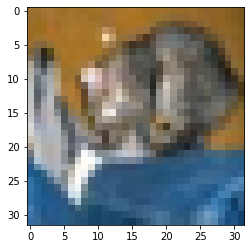

In [24]:
imshow(imagest_[0])

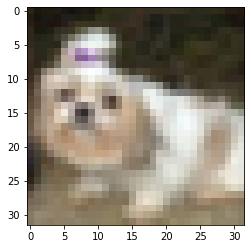

guessed:  dog
reality:  dog


In [97]:
num = 2056

imshow(imagest_[num-1])

output = net3(imagest_[num-1:num])
_, pred = torch.max(output, 1)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print("guessed: ", classes[pred[0]])
print("reality: ", classes[labelst_[num-1]])